# Определение профиля абонента

## **Задачи:**  

1. Необходимо определить профиль абонента, активно потребляющего интернет-трафик:

 1.1. определите порог, с которого начинается активное потребление интернет-трафика,  
 1.2. самостоятельно выберите наиболее значимые характеристики абонента для составления профиля.
2. Кратко оцените качество и пригодность данных, предоставленных для анализа. Какая информация является избыточной и что стоило бы добавить.

**Листы файла содержат следующие данные:**		

**Абоненты** - Информация об абонентах							
**Начисления** -	Информация о начислениях указанных абонентов (за 1 месяц)							
**Трафики** -	Информация о голосовом и интернет-трафике указанных абонентов (за 1 месяц)							

## Решение

Пропишем вспомогательные функции

In [481]:
import sys; print(sys.version)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# Оценка маркетинговых Кампаний
from datetime import datetime
from datetime import date
import warnings
warnings.simplefilter("ignore")

3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]


In [482]:
#определим цвет для текстов
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [483]:
#функция ислледовательского анализа
def display_info(name, head, tail, shape, info, nan, describe, duplicate, unique, corr, corr_map):
    #**Функция print_basic_info, для вывода информации о массиве, и его переменных.**

    #* name - название базы данных
    #* head - n: вывод примера базы (вывод n - строк), n = 0: не вывод
    #* tail - n: вывод примера базы (вывод n - строк), n = 0: не вывод
    #* shape - 1: вывод информаии о размерах датасета,  другое: не вывод
    #* info - 1: вывод информации о массиве, другое: не вывод
    #* nan - 1: вывод информации количестве пропусков, другое: не вывод
    #* describe - 1: вывод описания переменных массива, другое: не вывод   
                  #Возвращает транспонированный describe()
                  #Добавляет строку с долей пропусков для каждого столбца
    #* duplicate - 1: вывод количества полных дублей
    #* unique - 1: вывод количества неуникальных значений, другое: не вывод
    #* corr - 1: вывод цоэффициентов корреляции, другое: не вывод
    
    if head >= 1:
        print("\n", color.BOLD + color.RED + 'HEAD' + color.END, "\n")
        display(name.head(head))
    if tail >= 1:
        print("\n", color.BOLD + color.RED + 'TAIL' + color.END, "\n")
        display(name.tail(tail))
    if shape == 1:
        print("\n", color.BOLD + color.RED + 'SHAPE' + color.END, "\n")
        display(name.shape)
    if info == 1:
        print("\n", color.BOLD + color.RED + 'INFO' + color.END, "\n")
        display(name.info())
    if nan == 1:
        print("\n", color.BOLD + color.RED + 'Пустые ячейки, %' + color.END, "\n")
        display(round(name.isna().sum()/name.shape[0]*100, 2))
    if unique == 1:
        print("\n", color.BOLD + color.RED + 'Уникальные значения' + color.END, "\n")
        display(name.nunique())
    if describe == 1:
        print("\n", color.BOLD + color.RED + 'Статистики' + color.END, "\n")
        display(round(name.describe().transpose(), 2))
    if duplicate == 1:
        print("\n", color.BOLD + color.RED + 'Полностью дублирущие строки' + color.END, "\n")
        display(name[name.duplicated() == True][name.columns[0]].count())
    if corr == 1:
        print("\n", color.BOLD + color.RED + 'CORR' + color.END, "\n")
        display(name.corr())
    if corr_map != 'None':
        print("\n", color.BOLD + color.RED + 'CORR_MAP' + color.END, "\n")
        display(sns.heatmap(name.corr(), vmin = corr_map))

### Загружаем данные

**Загрузим данные в три отдельные таблицы**

In [484]:
#прочитаем файл excel и перезапишем его в формат csv для быстрого чтения при дальнейшей работе
#file = pd.read_excel('test_1.xlsx', sheet_name='Абоненты')
#file.to_csv('test_1_clients.csv')

clients = pd.read_csv('test_1_clients.csv',  index_col='Абонент')
clients.drop(['Unnamed: 0'], inplace=True, axis=1)
display(clients.head())

,Тарифный план,Группа ТП,Дата активации,Регион,Пол,Дата рождения
Абонент,,,,,,
1,ТП 1,1,2004-06-28,Минск,М,1969-12-20
2,ТП 2,1,2004-12-11,Минск,М,1987-11-24
3,ТП 3,1,2005-06-14,Минск,М,1983-07-25
4,ТП 1,1,2005-01-01,Минск,М,1981-12-11
5,ТП 2,1,2005-05-04,Минск,Ж,1986-08-31


In [485]:
charges = pd.read_csv('test_1_charges.csv',  index_col='Абонент')
charges.drop(['Unnamed: 0'], inplace=True, axis=1)
display(charges.head())

,Все начисления,Начисления за интернет-трафик,Начисления за входящие вызовы,Начисления за исходящие вызовы
Абонент,,,,
1,4.974000,0.000000,0.0,0.00000
2,9.510844,3.717844,0.0,5.08200
3,14.294928,0.000000,0.0,11.34474
4,9.888000,0.000000,0.0,0.00000
5,9.534000,0.000000,0.0,2.98200


In [486]:
traffic = pd.read_csv('test_1_traffic.csv', index_col='Абонент')
traffic.drop(['Unnamed: 0'], inplace=True, axis=1)
display(traffic.head())

,"Входящие вызовы, кол-во","Входящие вызовы, длит-ть в сек","Исходящие вызовы, кол-во","Исходящие вызовы, длит-ть","Интернет-трафик, МБ"
Абонент,,,,,
1,43,2579,123,9452,1485.007994
2,97,10806,95,12155,4544.004147
3,81,12728,61,13878,21.882568
4,81,16935,125,36780,8.795488
5,119,17840,85,8149,43.251675


Анализировать необходимо данные только для тех абонентов, которые есть в таблице "Абоненты" (clients). Поэтому при  объединении таблиц для дальнейшего анализа оставим абонетов, по которым есть все данные из начислений и тарифов

In [487]:
df = pd.concat([clients, charges, traffic], axis=1)
df = df.dropna(subset=['Тарифный план', 'Все начисления'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108373 entries, 1 to 109147
Data columns (total 15 columns):
Тарифный план                     108373 non-null object
Группа ТП                         108373 non-null float64
Дата активации                    108366 non-null object
Регион                            108373 non-null object
Пол                               96333 non-null object
Дата рождения                     97410 non-null object
Все начисления                    108373 non-null float64
Начисления за интернет-трафик     108373 non-null float64
Начисления за входящие вызовы     108373 non-null float64
Начисления за исходящие вызовы    108373 non-null float64
Входящие вызовы, кол-во           108373 non-null int64
Входящие вызовы, длит-ть в сек    108373 non-null int64
Исходящие вызовы, кол-во          108373 non-null int64
Исходящие вызовы, длит-ть         108373 non-null int64
Интернет-трафик, МБ               108373 non-null float64
dtypes: float64(6), int64(4), obje

### Знакомимся с данными

In [488]:
display_info(name=df,  head=0, tail=5, shape=1, info=1, nan=1, describe=1, duplicate=1, unique=0, corr=0, corr_map='None')


 TAIL 



,Тарифный план,Группа ТП,Дата активации,Регион,Пол,Дата рождения,Все начисления,Начисления за интернет-трафик,Начисления за входящие вызовы,Начисления за исходящие вызовы,"Входящие вызовы, кол-во","Входящие вызовы, длит-ть в сек","Исходящие вызовы, кол-во","Исходящие вызовы, длит-ть","Интернет-трафик, МБ"
Абонент,,,,,,,,,,,,,,,
109143,ТП 11,3.0,2013-01-31,Витебск,NaN,NaN,1.130851,1.614396,0.0,0.06954,286,45640,212,44327,584.835558
109144,ТП 11,3.0,2013-01-31,Минск,NaN,NaN,0.465338,0.154224,0.0,0.12578,262,29826,269,31876,2641.303535
109145,ТП 11,3.0,2013-01-31,Могилев,NaN,NaN,0.135154,0.000000,0.0,0.00000,305,37465,174,24747,12.659479
109146,ТП 11,3.0,2013-01-31,Минск,NaN,NaN,0.128033,0.000000,0.0,0.00000,70,34704,66,15753,405.642317
109147,ТП 2,1.0,2013-01-31,Минск,М,1993-01-08,0.108354,0.000000,0.0,0.05420,151,32767,138,58016,133.473950



 SHAPE 



(108373, 15)


 INFO 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108373 entries, 1 to 109147
Data columns (total 15 columns):
Тарифный план                     108373 non-null object
Группа ТП                         108373 non-null float64
Дата активации                    108366 non-null object
Регион                            108373 non-null object
Пол                               96333 non-null object
Дата рождения                     97410 non-null object
Все начисления                    108373 non-null float64
Начисления за интернет-трафик     108373 non-null float64
Начисления за входящие вызовы     108373 non-null float64
Начисления за исходящие вызовы    108373 non-null float64
Входящие вызовы, кол-во           108373 non-null int64
Входящие вызовы, длит-ть в сек    108373 non-null int64
Исходящие вызовы, кол-во          108373 non-null int64
Исходящие вызовы, длит-ть         108373 non-null int64
Интернет-трафик, МБ               108373 non-null float64
dtypes: float64(6), int64

None


 Пустые ячейки, % 



Тарифный план                      0.00
Группа ТП                          0.00
Дата активации                     0.01
Регион                             0.00
Пол                               11.11
Дата рождения                     10.12
Все начисления                     0.00
Начисления за интернет-трафик      0.00
Начисления за входящие вызовы      0.00
Начисления за исходящие вызовы     0.00
Входящие вызовы, кол-во            0.00
Входящие вызовы, длит-ть в сек     0.00
Исходящие вызовы, кол-во           0.00
Исходящие вызовы, длит-ть          0.00
Интернет-трафик, МБ                0.00
dtype: float64


 Статистики 



,count,mean,std,min,25%,50%,75%,max
Группа ТП,108373.0,1.46,0.74,1.00,1.00,1.00,2.00,3.00
Все начисления,108373.0,12.96,12.65,0.00,5.92,10.09,16.20,693.86
Начисления за интернет-трафик,108373.0,2.07,5.95,0.00,0.00,0.01,2.35,620.35
Начисления за входящие вызовы,108373.0,0.00,0.03,0.00,0.00,0.00,0.00,4.73
Начисления за исходящие вызовы,108373.0,4.65,7.37,0.00,0.76,2.87,6.07,609.16
"Входящие вызовы, кол-во",108373.0,157.21,112.77,1.00,78.00,133.00,208.00,2497.00
"Входящие вызовы, длит-ть в сек",108373.0,24886.85,25302.86,1.00,9507.00,18024.00,31806.00,801186.00
"Исходящие вызовы, кол-во",108373.0,163.08,124.63,1.00,78.00,135.00,214.00,2127.00
"Исходящие вызовы, длит-ть",108373.0,26605.28,28166.72,1.00,9610.00,18704.00,33745.00,683984.00
"Интернет-трафик, МБ",108373.0,2112.31,11035.57,2.73,113.81,413.85,1639.58,1687558.05



 Полностью дублирущие строки 



0

* Есть пропуски в стролбцах "Пол" и "Дата рождения". Заполним такие ячейки значением "unknown", чтобы не потерять значения начислений и трафика по таким абонентам
* Количество пропусков в столбце "Дата активации" совсем незначительное, удалим их из анализа
* Столбцы с датами надо привести к усваемому кодом формату

In [489]:
#заполняем пустые ячейки в столбце "Дата активации"
df = df.dropna(subset=['Дата активации'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108366 entries, 1 to 109147
Data columns (total 15 columns):
Тарифный план                     108366 non-null object
Группа ТП                         108366 non-null float64
Дата активации                    108366 non-null object
Регион                            108366 non-null object
Пол                               96329 non-null object
Дата рождения                     97406 non-null object
Все начисления                    108366 non-null float64
Начисления за интернет-трафик     108366 non-null float64
Начисления за входящие вызовы     108366 non-null float64
Начисления за исходящие вызовы    108366 non-null float64
Входящие вызовы, кол-во           108366 non-null int64
Входящие вызовы, длит-ть в сек    108366 non-null int64
Исходящие вызовы, кол-во          108366 non-null int64
Исходящие вызовы, длит-ть         108366 non-null int64
Интернет-трафик, МБ               108366 non-null float64
dtypes: float64(6), int64(4), obje

In [490]:
#заполняем пустые ячейки значенеим "unknown" в столбцах с пустыми ячейками
df = df.fillna('unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108366 entries, 1 to 109147
Data columns (total 15 columns):
Тарифный план                     108366 non-null object
Группа ТП                         108366 non-null float64
Дата активации                    108366 non-null object
Регион                            108366 non-null object
Пол                               108366 non-null object
Дата рождения                     108366 non-null object
Все начисления                    108366 non-null float64
Начисления за интернет-трафик     108366 non-null float64
Начисления за входящие вызовы     108366 non-null float64
Начисления за исходящие вызовы    108366 non-null float64
Входящие вызовы, кол-во           108366 non-null int64
Входящие вызовы, длит-ть в сек    108366 non-null int64
Исходящие вызовы, кол-во          108366 non-null int64
Исходящие вызовы, длит-ть         108366 non-null int64
Интернет-трафик, МБ               108366 non-null float64
dtypes: float64(6), int64(4), ob

In [491]:
#меняем формат ячеек с датами
df['Дата активации'] = pd.to_datetime(df['Дата активации'], format='%Y-%m-%d', errors='coerce')
df['Дата рождения'] = pd.to_datetime(df['Дата рождения'], format='%Y-%m-%d', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108366 entries, 1 to 109147
Data columns (total 15 columns):
Тарифный план                     108366 non-null object
Группа ТП                         108366 non-null float64
Дата активации                    108366 non-null datetime64[ns]
Регион                            108366 non-null object
Пол                               108366 non-null object
Дата рождения                     97406 non-null datetime64[ns]
Все начисления                    108366 non-null float64
Начисления за интернет-трафик     108366 non-null float64
Начисления за входящие вызовы     108366 non-null float64
Начисления за исходящие вызовы    108366 non-null float64
Входящие вызовы, кол-во           108366 non-null int64
Входящие вызовы, длит-ть в сек    108366 non-null int64
Исходящие вызовы, кол-во          108366 non-null int64
Исходящие вызовы, длит-ть         108366 non-null int64
Интернет-трафик, МБ               108366 non-null float64
dtypes: datetime6

**Посмотрим на распределение дат**

In [492]:
df['Год активации'] = pd.DatetimeIndex(df['Дата активации']).year
df['Год активации'] = df['Год активации'].astype('int')
df['Год активации'].value_counts()

2012    12920
2006    12908
2010    12125
2005    11901
2011    11674
2009    11223
2004    10806
2007     9328
2008     8485
2003     5284
2013     1215
2002      496
1999        1
Name: Год активации, dtype: int64

Нашелся абонент, который был активированв 1999 году. Такого не может быть, так как компания МТС была открыта в Беларуси в 2002. Удалим такого абонента из анализа

In [493]:
df = df.loc[df['Год активации'] >=2002 ]
(df['Год активации'].value_counts(normalize=True)*100).round(2)

2012    11.92
2006    11.91
2010    11.19
2005    10.98
2011    10.77
2009    10.36
2004     9.97
2007     8.61
2008     7.83
2003     4.88
2013     1.12
2002     0.46
Name: Год активации, dtype: float64

Добавим столбец возраста абонента

In [494]:
def calculate_age(born):
    born = datetime.strptime(str(born), "%Y-%m-%d %H:%M:%S").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
   

df['Возраст'] = df.loc[df['Дата рождения'].isna() ==False]['Дата рождения'].apply(calculate_age)
df['Возраст'] = df['Возраст'].astype('int', errors='ignore')
print("\n", color.BOLD + color.GREEN + 'Статистики возраста' + color.END, "\n")
df['Возраст'].describe().round(2)


 Статистики возраста 



count    97406.00
mean        41.54
std         10.78
min         13.00
25%         33.00
50%         39.00
75%         49.00
max        121.00
Name: Возраст, dtype: float64

Все таки возраст свыше 101 года будем считать выбросом, аномалией, а возможно ошибкой выгрузки. Заменим возраст таких абонентов на средний возраст всех абонентов

In [495]:
df.loc[(df['Возраст'] > 101), 'Возраст'] = df.loc[(df['Возраст'] <= 101) & (df['Возраст'] > 0)]['Возраст'].mean()
df.loc[(df['Возраст'] < 1), 'Возраст'] = df.loc[(df['Возраст'] <= 101) & (df['Возраст'] > 0)]['Возраст'].mean()

In [496]:
df['Возраст'].describe()

count    97406.000000
mean        41.519649
std         10.715533
min         13.000000
25%         33.000000
50%         39.000000
75%         49.000000
max        101.000000
Name: Возраст, dtype: float64

Удалим столбцы с датами, так как мы взяли из них всю необходимую информацию

In [497]:
df = df.drop(['Дата рождения','Дата активации'], axis=1)

###  Определние профиля абонента

**Определим  порог,с которого начинается активное потребление интернет-трафика**

In [498]:
#Для добства переведем трафик в Гигабайты
df['Интернет-трафик, Гб'] = df['Интернет-трафик, МБ'] / 1000

**Посмотрим на статистики использования интернет-трафика**

In [499]:
df['Интернет-трафик, МБ'].describe().round(2)

count     108365.00
mean        2112.44
std        11035.97
min            2.73
25%          113.81
50%          413.89
75%         1639.68
max      1687558.05
Name: Интернет-трафик, МБ, dtype: float64

Проверим какова доля потребления трафика абонентов, которые попали в 3 квартиль распределения данных

In [500]:
c = df['Интернет-трафик, МБ'].sum() /1000
a = df.loc[df['Интернет-трафик, МБ'] < 1639]['Интернет-трафик, МБ'].sum().round(2) / 1000 * 100
b = df.loc[df['Интернет-трафик, МБ'] > 1639]['Интернет-трафик, МБ'].sum().round(2) / 1000 * 100
print('Доля трафика абонентов, потребивших до 1700 мб, %:', (a/c).round(2))
print('Доля трафика абонентов, потребивших больше 1700 мб, %:', (b/c).round(2))

Доля трафика абонентов, потребивших до 1700 мб, %: 13.74
Доля трафика абонентов, потребивших больше 1700 мб, %: 86.26


* Видим, что 50% всех пользователей потребляют 413 мб и меньше. Таких абонентов можно отнести к неактивным пользователям интернета. 
* Остается еще 50% всех абонетов, половина которых расходует от 413 до 1639 мб в месяц, остальная половина прилично выходит за эти рамки.
* Однако, 75% абонентов, тратят лишь 14% трафика от всего объема за месяца.
* К активным пользователям условно отнесем тех пользователей, которые потребляют интернет свыше 1640 мб в месяц.

In [501]:
active = df.loc[df['Интернет-трафик, МБ'] > 1640]

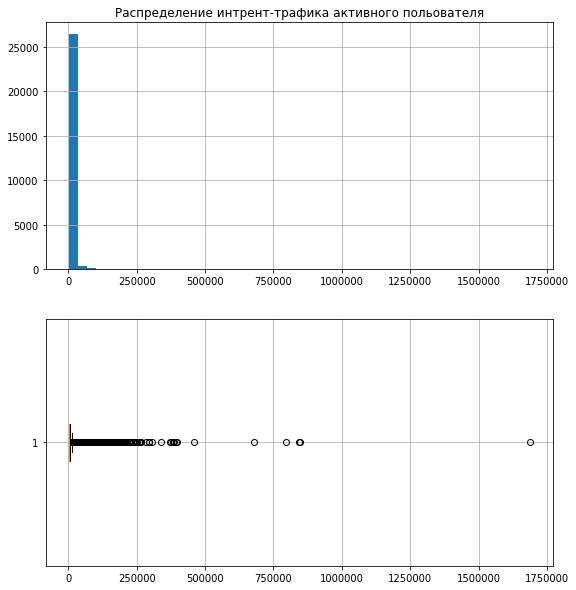

In [502]:
def hist_box(data, column):
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.hist(data[column], bins =50,
             #density=True,
             )
    #plt.legend()
    
    plt.title("Распределение интрент-трафика активного польователя") # заголовок
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.boxplot(data[column], vert=False)
    plt.grid(True)
hist_box(active.loc[active["Интернет-трафик, МБ"] >0], 'Интернет-трафик, МБ')

* «Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильным размахам (IQR). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы.
* Есть единичные случаи чрезмерно большого потребления трафика отнесем их к выбросам, нетипичным ситуациям. Не будем расматривать таких абонетов в дальнейшем анализе.
* Отсечем абонентов, которые потребили больше 400000 мб трафика

In [503]:
active = active.loc[active["Интернет-трафик, МБ"] <= 400000]

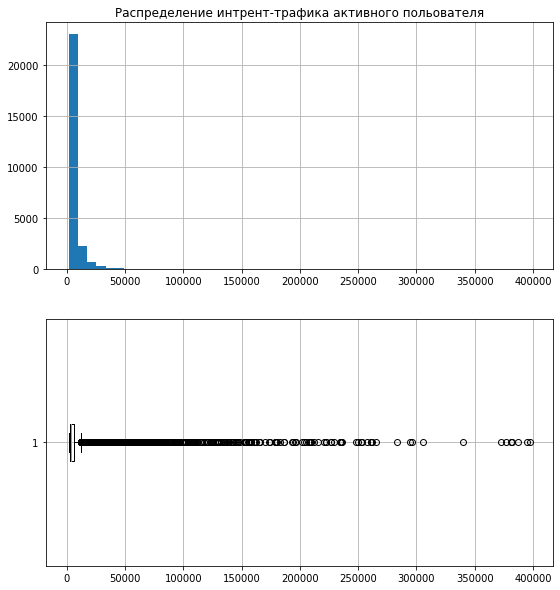

In [504]:
hist_box(active, 'Интернет-трафик, МБ')

###  Составление профиля абонента

**В данном раделе расчитаем все интересующие нас показатели, в конце напишем выводы по ним**

Посмотрим на доли каждого пола  и кто тратит больше интернета

In [505]:
active.query('Пол != "unknown"')['Пол'].value_counts(normalize=True)

М    0.530025
Ж    0.469975
Name: Пол, dtype: float64

In [506]:
print("\n", color.BOLD + color.GREEN + 'Сренее количество потребляемого трафика между мужчинами и женщинами' + color.END, "\n")
active.query('Пол != "unknown"').groupby(['Пол']).agg({'Интернет-трафик, МБ': 'mean'}).round(2)


 Сренее количество потребляемого трафика между мужчинами и женщинами 



,"Интернет-трафик, МБ"
Пол,
Ж,6586.29
М,7578.28


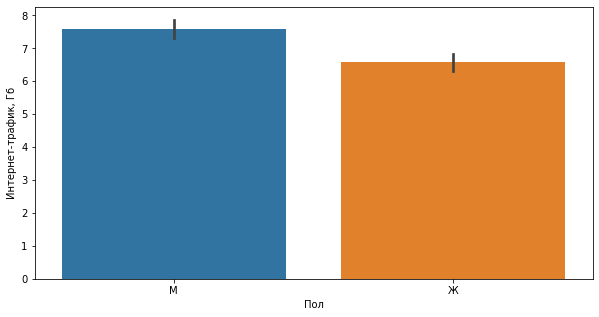

In [507]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
sns.barplot(x = active.loc[active['Пол']!= 'unknown']['Пол'],  y = active['Интернет-трафик, Гб'])
plt.show()

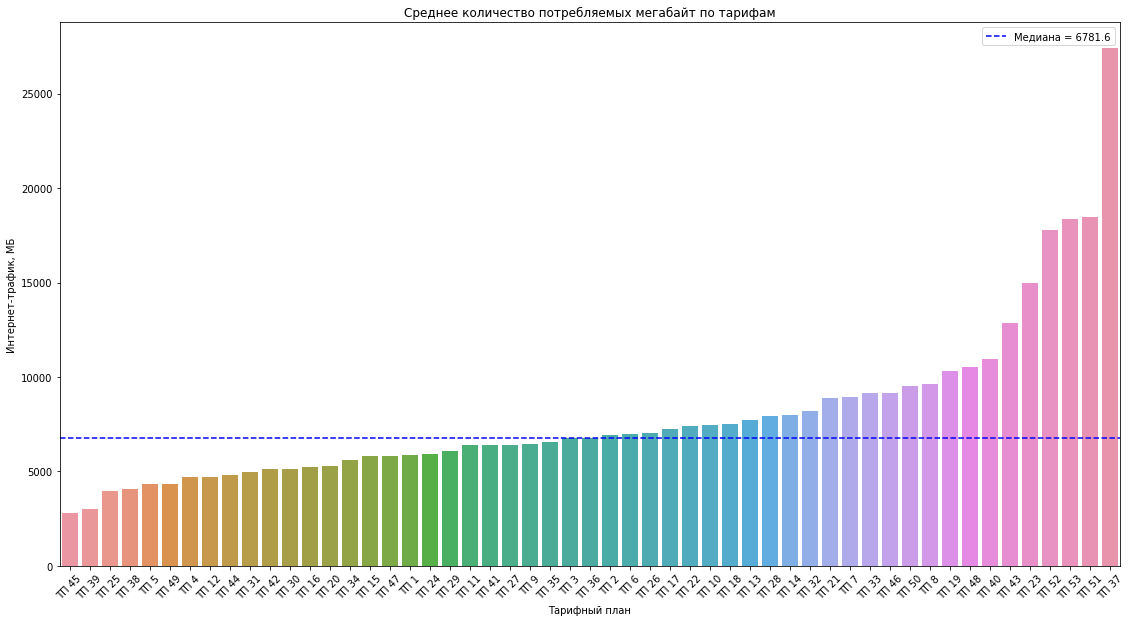

In [508]:
a = active.pivot_table(index = ['Тарифный план'], values = 'Интернет-трафик, МБ').sort_values(by=['Интернет-трафик, МБ']).reset_index()
fig = plt.gcf()
fig.set_size_inches(19, 10)
sns.barplot(x = a['Тарифный план'], y = a['Интернет-трафик, МБ'])
plt.axhline(a['Интернет-трафик, МБ'].median(), c='b', ls='--', 
            label = 'Медиана = {}'.format((a['Интернет-трафик, МБ'].median().round(2)))
           )
plt.legend()
plt.xticks(rotation=45)
plt.title('Среднее количество потребляемых мегабайт по тарифам')
plt.show()

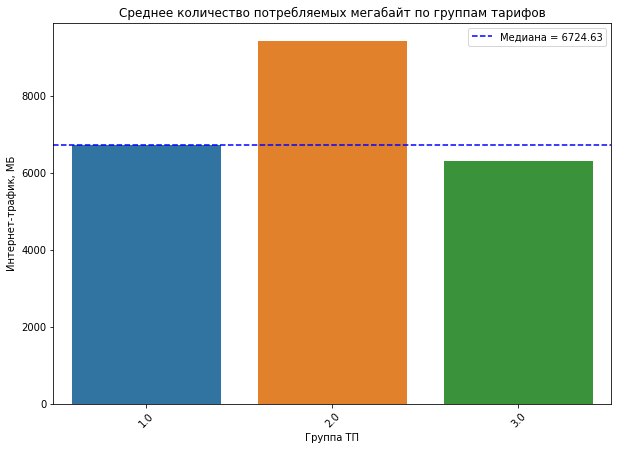

In [509]:
a = active.pivot_table(index = ['Группа ТП'], values = 'Интернет-трафик, МБ').sort_values(by=['Интернет-трафик, МБ']).reset_index()
fig = plt.gcf()
fig.set_size_inches(10, 7)
sns.barplot(x = a['Группа ТП'], y = a['Интернет-трафик, МБ'])
plt.axhline(a['Интернет-трафик, МБ'].median(), c='b', ls='--', 
            label = 'Медиана = {}'.format((a['Интернет-трафик, МБ'].median().round(2)))
           )
plt.legend()
plt.xticks(rotation=45)
plt.title('Среднее количество потребляемых мегабайт по группам тарифов')
plt.show()

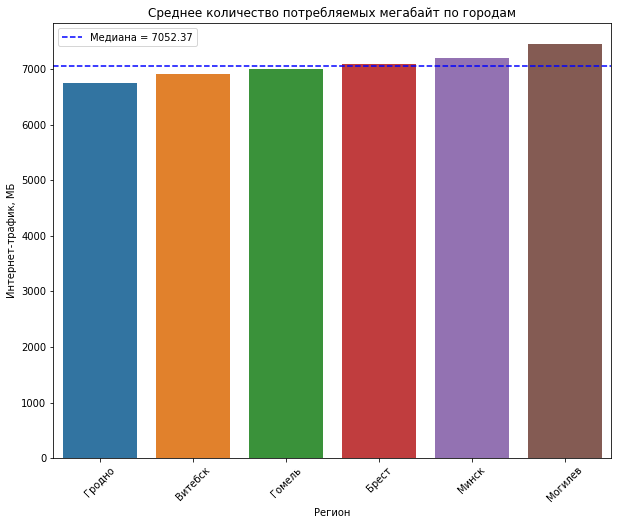

In [510]:
a = active.pivot_table(index = ['Регион'], values = 'Интернет-трафик, МБ').sort_values(by=['Интернет-трафик, МБ']).reset_index()
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.barplot(x = a['Регион'], y = a['Интернет-трафик, МБ'])
plt.axhline(a['Интернет-трафик, МБ'].median(), c='b', ls='--', 
            label = 'Медиана = {}'.format((a['Интернет-трафик, МБ'].median().round(2)))
           )
plt.legend()
plt.xticks(rotation=45)
plt.title('Среднее количество потребляемых мегабайт по городам')
plt.show()

In [511]:
print("\n", color.BOLD + color.GREEN + 'Доля абонентов по городам' + color.END, "\n")
(active.groupby(['Регион']).agg({'Интернет-трафик, МБ': 'mean'})/active.shape[0] * 100).round(2)


 Доля абонентов по городам 



,"Интернет-трафик, МБ"
Регион,
Брест,26.20
Витебск,25.51
Гомель,25.89
Гродно,24.91
Минск,26.57
Могилев,27.52


**Разобьем обанентов по возрастным группам**

In [512]:
label_ranges = [0, 15, 30, 45, 60, 80, np.inf]
label_names = ['15 и младше', '15-30', '30-45', '45-60', '60-80', '80 и старше']
# Create wait_type column
active['Возрастные группы'] = pd.cut(active['Возраст'], bins = label_ranges, 
                                labels = label_names)

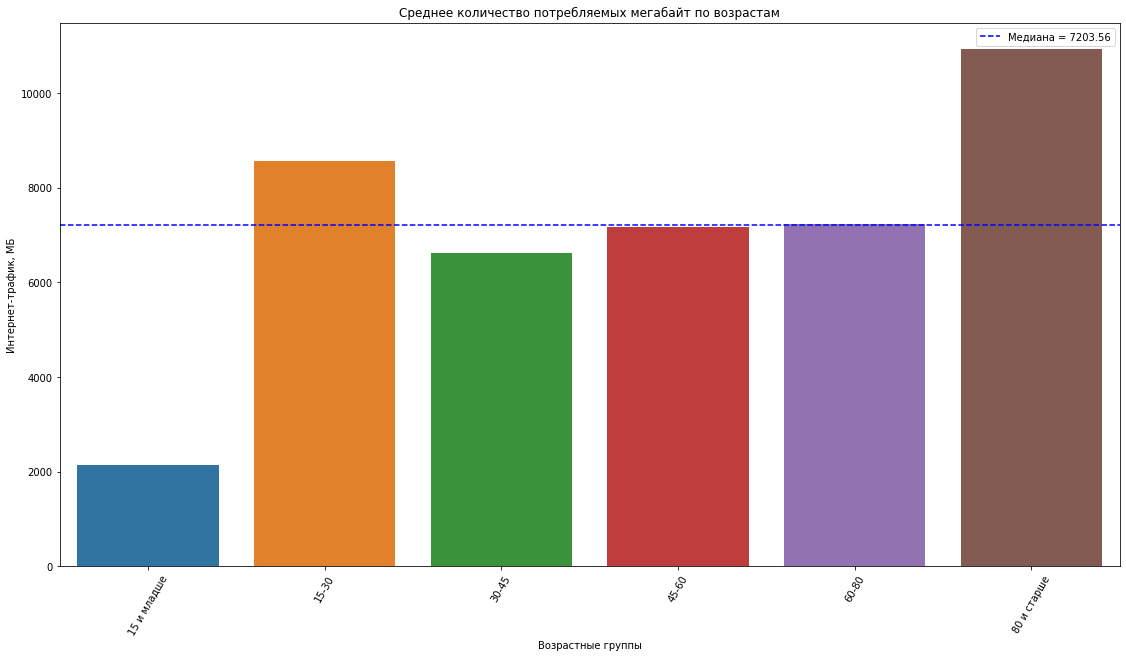

In [513]:
b = active.pivot_table(
    index = ['Возрастные группы'], values = 'Интернет-трафик, МБ', aggfunc='mean').reset_index()
b = b.sort_values(by= 'Интернет-трафик, МБ')
#.sort_values(
 #   by=['Интернет-трафик, МБ']).reset_index()
fig = plt.gcf()
fig.set_size_inches(19, 10)
sns.barplot(x = b['Возрастные группы'], y = b['Интернет-трафик, МБ'])
plt.axhline(b['Интернет-трафик, МБ'].median(), c='b', ls='--', 
            label = 'Медиана = {}'.format((b['Интернет-трафик, МБ'].median().round(2))))
plt.legend()
plt.xticks(rotation=60)
plt.title('Среднее количество потребляемых мегабайт по возрастам')
plt.show()

In [514]:
print("\n", color.BOLD + color.GREEN + 'Статистики показателей абонентов, актично потребляющих интернет-трафик' + color.END, "\n")
active.describe().transpose().round()


 Статистики показателей абонентов, актично потребляющих интернет-трафик 



,count,mean,std,min,25%,50%,75%,max
Группа ТП,27080.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
Все начисления,27080.0,16.0,15.0,0.0,7.0,12.0,19.0,694.0
Начисления за интернет-трафик,27080.0,3.0,8.0,0.0,0.0,1.0,4.0,620.0
Начисления за входящие вызовы,27080.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
Начисления за исходящие вызовы,27080.0,5.0,9.0,0.0,1.0,3.0,6.0,609.0
"Входящие вызовы, кол-во",27080.0,168.0,119.0,1.0,85.0,144.0,223.0,2497.0
"Входящие вызовы, длит-ть в сек",27080.0,26363.0,25926.0,1.0,10436.0,19520.0,34158.0,595672.0
"Исходящие вызовы, кол-во",27080.0,178.0,131.0,1.0,89.0,150.0,233.0,2127.0
"Исходящие вызовы, длит-ть",27080.0,29319.0,29295.0,1.0,11278.0,21180.0,37486.0,495371.0
"Интернет-трафик, МБ",27080.0,7094.0,15741.0,1640.0,2316.0,3573.0,6382.0,397357.0


## Вывод

1.1. В качестве порога, с которого начинается активное потребление интернет трафика выбран 3-й квартиль всех данных, эквивалентный 1640 мб.  
1.2. В результате расчетов получился следующий профиль абонента, активно потребляющего интернет:
 * численость активных пользователей интернет составила 27 тыс из 108 тыс абонентов за предложенный месяц;
 * в среднем активный потребитель интернета приносят 16 рублей в месяц общих начислений;
 * тратит на разговоры в среднем 431 минуту в месяц;
 * расходует в среднем 7105 мегабайт интернет-трафика;
 *  и являются абонентами компании более 12 лет
 * средний возраст такого абонента от 39 до 41 года
1.3. Дополнительно можно выделить следующие характеристики:
 * в среднем же, группа абонентов после 15 лет имеют средний объем потребления интернета;
  * одинаково абоненты распределены по регионам;
 * сильно выделяются абонет имеющий тарифный план ТП 37, но это скорее особенность, а не характерное описание;
 * так же выбиваются абоненты преклонного возраста после 80, у них отмечается максимальное потребление трафика;
 * а так де практически одинаковое соотношение мужчин и женщин (53% - мужчин? 47% - женщин)  
 
2. Было бы неплохо посмотреть такие показатели, как объем роуминга, смс, а так же данные за несколько месяцев. Были найдены абоненты у которых суммма общих начислений ниже, че сумма начислений за интернет, что странно. Информация о количестве звонков, исходящие и входящие звонки для меня была избыточной.